# Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import keras
from keras.api.models import Sequential
from keras.api.layers import Dense, Dropout, Flatten, Input, Conv2D, MaxPooling2D

# Load dataset

In [7]:
from keras.api.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print shapes
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Print the dataset classes

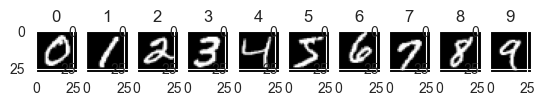

In [8]:
number_classes = 10
f, axes = plt.subplots(nrows=1, ncols=number_classes)

for i in range(number_classes):
    sample = x_train[i == y_train][0]
    axes[i].imshow(sample, cmap='gray')
    axes[i].set_title(str(i))


# Prepare data


In [9]:
y_train = keras.utils.to_categorical(y_train, number_classes)
y_test = keras.utils.to_categorical(y_test, number_classes)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train / 255.0
x_test = x_test / 255.0

# Create model

In [10]:
model = Sequential([
    Input(shape=(28, 28, 1)),

    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.20),
    Dense(256, activation='relu'),
    Dropout(0.20),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 972,426 (3.71 MB)

 Trainable params: 972,426 (3.71 MB)

 Non-trainable params: 0 (0.00 B)

# Fit the model

In [11]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8520 - loss: 0.4813 - val_accuracy: 0.9810 - val_loss: 0.0633
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9801 - loss: 0.0653 - val_accuracy: 0.9845 - val_loss: 0.0508
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9872 - loss: 0.0405 - val_accuracy: 0.9881 - val_loss: 0.0376
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9902 - loss: 0.0306 - val_accuracy: 0.9885 - val_loss: 0.0387
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9932 - loss: 0.0215 - val_accuracy: 0.9889 - val_loss: 0.0403
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9939 - loss: 0.0182 - val_accuracy: 0.9892 - val_loss: 0.0397
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9959 - loss: 0.0132 - val_accuracy: 0.9897 - val_loss: 0.0428
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9962 - loss: 0.0116 - 

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,917,280 (11.13 MB)

 Trainable params: 972,426 (3.71 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,944,854 (7.42 MB)

# Evaluate

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9874 - loss: 0.0494
Test accuracy: 0.9901999831199646
Test loss: 0.038326334208250046


# Predict for 1 image

In [14]:
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_class)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[7.4668741e-20 7.2337183e-13 3.0626319e-14 ... 1.0000000e+00
  2.8423247e-19 8.7846104e-13]
 [1.2436281e-11 2.3863031e-11 1.0000000e+00 ... 1.1395646e-14
  3.5223910e-15 1.9589647e-16]
 [6.7278245e-09 9.9999499e-01 1.3607830e-06 ... 3.4225122e-06
  2.9704831e-08 8.1305513e-09]
 ...
 [1.2974567e-16 4.6510179e-12 1.0460230e-13 ... 2.8969303e-12
  1.7129332e-09 6.0280439e-12]
 [1.2267925e-11 4.4947719e-14 4.2063462e-18 ... 1.0972938e-13
  9.7504360e-10 5.5301616e-14]
 [2.7425795e-09 2.7637181e-11 1.3140450e-10 ... 1.2157471e-14
  3.2388778e-10 3.9594226e-12]]
[7 2 1 ... 4 5 6]


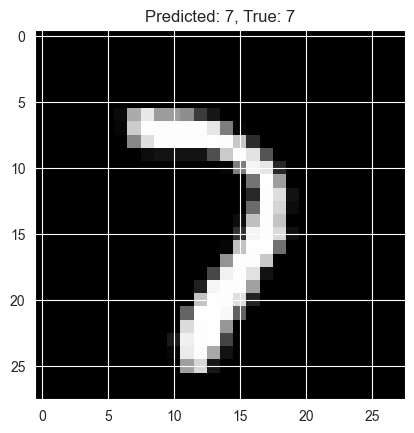

In [15]:
random_index = np.random.choice(len(y_pred))

x_sample = x_test[random_index]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_index]
y_sample_pred_class = y_pred_class[random_index]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true))
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Predicted class: 4
True class: 4


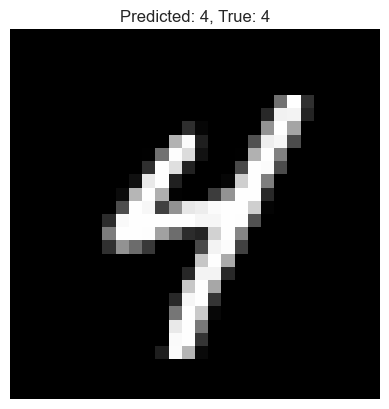

In [16]:
def preprocess_image(image):
    # Ensure the image has the same preprocessing as the training images
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Load a single image from the test set
random_index = np.random.choice(len(x_test) - 1)
single_image = x_test[random_index]  # Using the first image from the test set
preprocessed_image = preprocess_image(single_image)

# Predict
prediction = model.predict(preprocessed_image)
predicted_class = np.argmax(prediction, axis=1)

# True class
true_class = np.argmax(y_test[random_index])

print(f"Predicted class: {predicted_class[0]}")
print(f"True class: {true_class}")

# Display the image with its predicted and true classes
plt.imshow(single_image, cmap='gray')
plt.title(f"Predicted: {predicted_class[0]}, True: {true_class}")
plt.axis('off')
plt.show()

In [17]:
model.save('./models/bootstrap.keras')

In [18]:
model = keras.models.load_model('./models/bootstrap.keras')